# Testing the Ensemble

In [1]:
%pylab inline
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lib import XGBHelper as xgbh
import pandas as pd

from pipeline.lib.logger import logger
xgb.__version__

Populating the interactive namespace from numpy and matplotlib


'1.4.0'

In [2]:
!ls ../data/

172 248


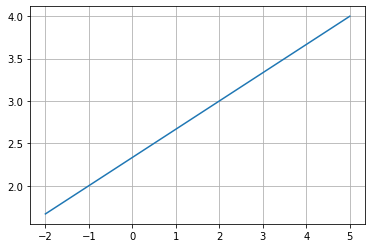

In [3]:
# Find the coefficients of a line going through (x1,y1),(x2,y2)
def solve(x1,x2,y1,y2):
    b=(y1-y2)/(x1-x2)
    a=0.5*(y1+y2-b*(x1+x2))
    return a,b

a,b=solve(-1,5,2,4)
x=arange(-2,6)
plot(x,a+b*x)
grid()

In [4]:
def createDM(df):
    labels=df['label']
    features=df.drop('label',axis=1)
    return xgb.DMatrix(features, label=labels)

def split_data(df,frac=0.5):
    train = df.sample(frac = 0.5)
    test  = df.drop(train.index)

    trainDM=createDM(train)
    testDM=createDM(test)
    AllDM=createDM(df)
    return trainDM,testDM,AllDM

In [5]:
import pickle as pk
with open('../data/172/BoostedTrees.pkl','br') as pkl_file:
    bst_list=pk.load(pkl_file)

FileNotFoundError: [Errno 2] No such file or directory: '../data/172/BoostedTrees.pkl'

In [27]:
bad=[]
for section in [164,172,248]:
    filename='../data/%d/puntas.csv'%section

    df=pd.read_csv(filename)

    trainDM,testDM,AllDM=split_data(df)
    labels=AllDM.get_label()
    scores=np.zeros([df.shape[0],len(bst_list)])
    for i in range(len(bst_list)):
        bst=bst_list[i]
        scores[:,i] = bst.predict(AllDM, iteration_range=[1,bst.best_ntree_limit], output_margin=True)

    _max=np.max(scores,axis=1)
    _min=np.min(scores,axis=1)

    #figure(figsize=[15,10])
    #scatter((_min+_max)/2,_max-_min,c=labels)
    #title('min and max of scores for section %d, tree depth=1'%section)
    #xlabel('(max+min)/2')
    #ylabel('max-min')
    #grid()

    _mean=np.mean(scores,axis=1)
    _std=np.std(scores,axis=1)
    false_pos=np.nonzero((_mean>0)*(labels==0))[0]
    false_neg=np.nonzero((_mean<0)*(labels==1))[0]
    bad.append({'section':section,
               'false_pos':false_pos,
               'false_neg':false_neg})
    figure(figsize=[15,10])
    scatter(_mean,_std,c=labels)
    plot([0,-2.5],[1,2])
    plot([0,2.5],[1,2])

    title('mean and std for section %d, tree depth=1'%section)
    xlabel('mean')
    ylabel('std')
    grid()

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.animal

## TODO
Drop from df the features that are no in "old", before calling Predict. Then reunite to create table for Ed.

In [33]:
df.columns

Index(['Unnamed: 0', 'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'm00', 'm10',
       'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11',
       'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30',
       'nu21', 'nu12', 'nu03', 'animal', 'section', 'index', 'label', 'area',
       'height2', 'width2', 'row', 'col'],
      dtype='object')

In [37]:
#Old = df.columns
Old

Index(['Unnamed: 0', 'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'm00', 'm10',
       'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11',
       'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30',
       'nu21', 'nu12', 'nu03', 'index', 'label', 'area', 'height2', 'width2',
       'corr', 'energy'],
      dtype='object')

In [36]:
full_df=pd.DataFrame(df)

In [38]:
df=df[Old]

KeyError: "['corr', 'energy'] not in index"

In [9]:
with open('../data/172/BadExamples.pkl','bw') as pkl_file:
    pk.dump(bad,pkl_file)

In [10]:
for b in bad:
    #print(b)
    print(b['section'],b['false_pos'].shape,b['false_neg'].shape)

172 (9,) (10,)
164 (8,) (10,)
248 (2,) (8,)


In [11]:
with open('../data/172/BadExamples.pkl','bw') as pkl_file:
    pk.dump(bad,pkl_file)
       

In [8]:
df['index']

0          0
1          1
2          2
3          3
4          4
        ... 
1276    1293
1277    1294
1278    1295
1279    1296
1280    1297
Name: index, Length: 1281, dtype: int64

In [9]:
bad[0],df.iloc[bad[0],:]['index']

(array([806, 904]),
 806    806
 904    904
 Name: index, dtype: int64)

In [10]:
df.loc[:10,'index']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
Name: index, dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'm00', 'm10',
       'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11',
       'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30',
       'nu21', 'nu12', 'nu03', 'index', 'label', 'area', 'height2', 'width2'],
      dtype='object')

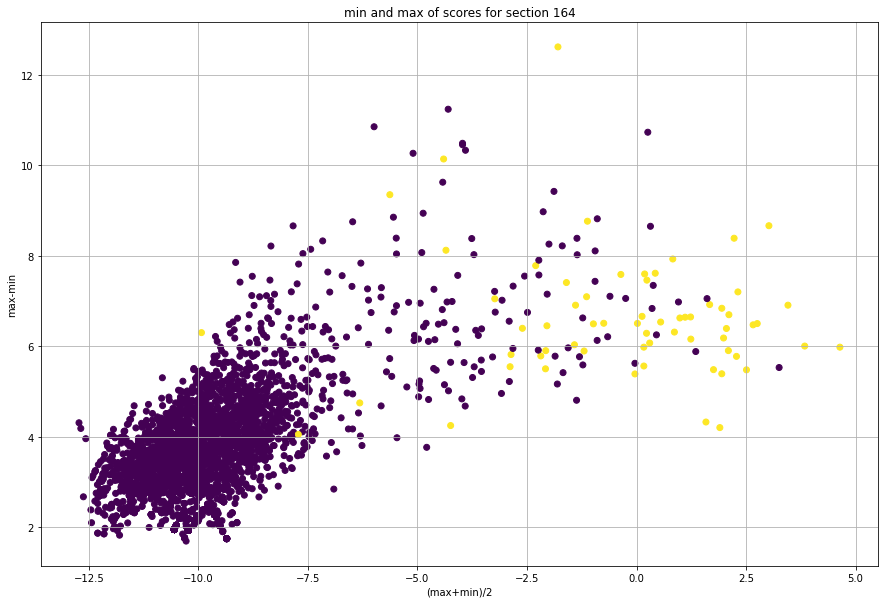

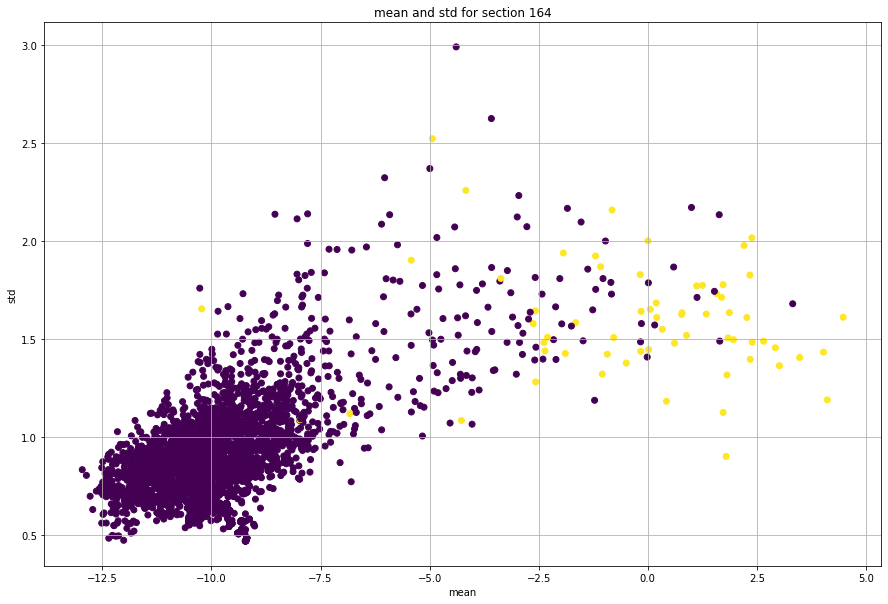

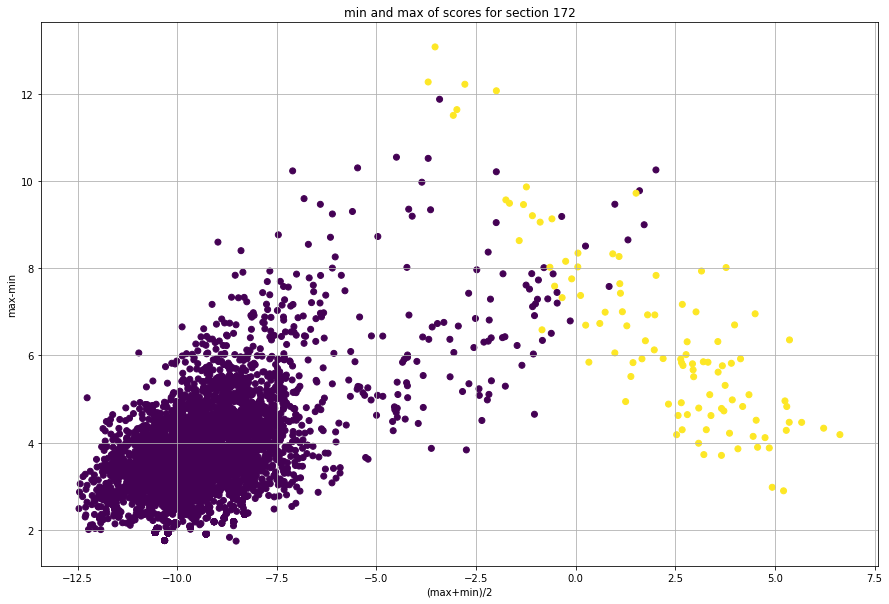

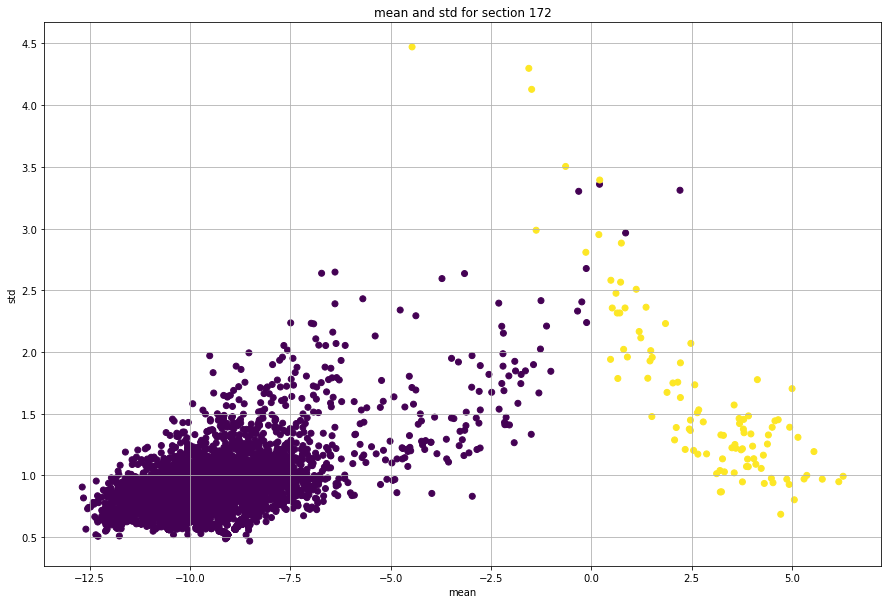

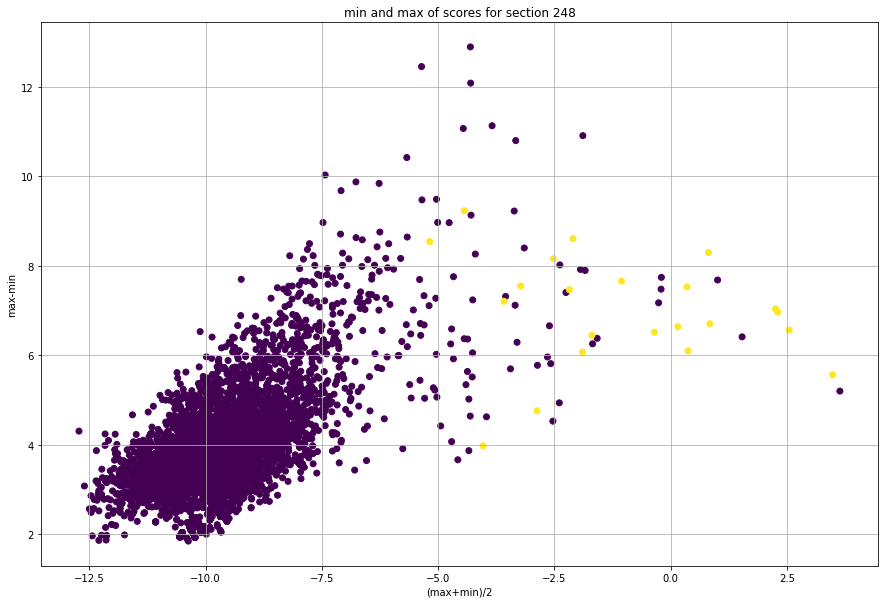

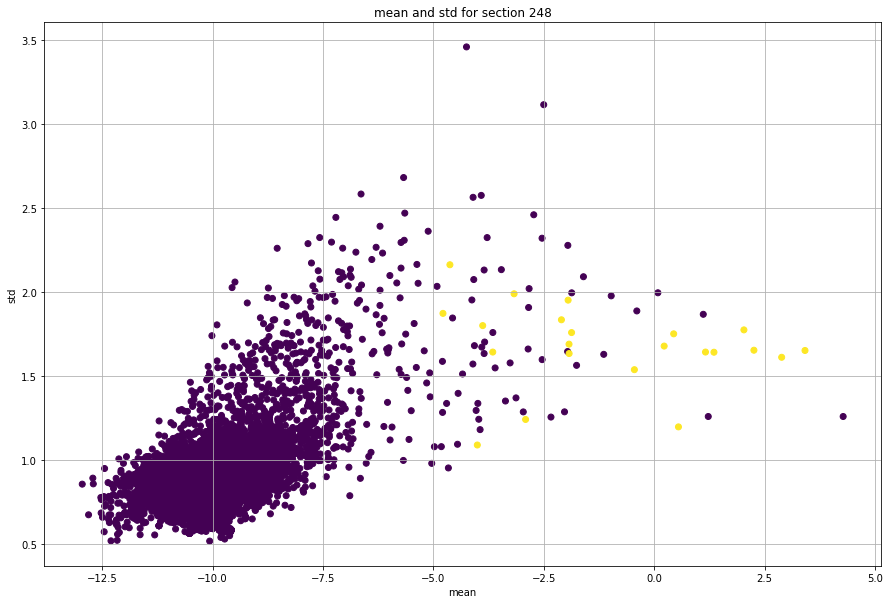

In [44]:
#tree depth 2


In [30]:
plot([-1,5],[2,4])
a,b=solve(-1,5,2,4)
x=arange(-2,5)
plot(x,a+b*x)
plot([-1,-5],[2,4])
a,b=solve(-1,-5,2,4)
x=arange(-5,2)
plot(x,a+b*x)

plot([-1,-1],[2,0])


-rw-r--r--  1 yoavfreund  staff   2.1M Aug 16 10:28 ../data/248/puntas.csv
